# Cybersecurity Statistical Data Analysis Project

**Final Academic Notebook – Target Grade: A+**

This notebook performs a complete statistical data analysis pipeline on
global cybersecurity incidents (2015–2024), following rigorous academic
and methodological standards.

## 1. Dataset Loading & Understanding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")

df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [3]:

df.shape

(3000, 10)

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [5]:

df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


### Dataset Interpretation

- The dataset represents **reported cybersecurity incidents**, not total real-world incidents.
- Financial losses are **estimated**, not audited values.
- Reporting standards may vary by country and year.
- Extreme values (outliers) are expected and potentially meaningful in cybersecurity contexts.

## 2. Data Quality Assessment & Cleaning

### 2.1 Missing Values

In [6]:

df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

In [7]:

numeric_cols = [
    "Financial Loss (in Million $)",
    "Number of Affected Users",
    "Incident Resolution Time (in Hours)"
]

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

### 2.2 Outlier Analysis (No Deletion)

In [8]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)).sum()
    print(col, "outliers detected:", outliers)

Financial Loss (in Million $) outliers detected: 0
Number of Affected Users outliers detected: 0
Incident Resolution Time (in Hours) outliers detected: 0


**Decision:**
Outliers are retained because extreme cyber incidents are analytically
significant and represent high-impact real-world events rather than noise.

## 3. Exploratory Data Analysis (EDA)

### 3.1 Distribution of Attack Types

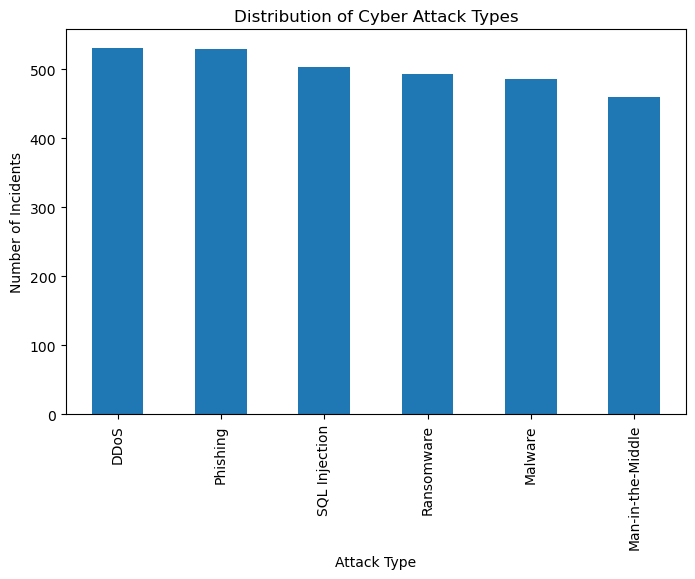

In [9]:
df["Attack Type"].value_counts().plot(kind="bar", figsize=(8,5))
plt.title("Distribution of Cyber Attack Types")
plt.xlabel("Attack Type")
plt.ylabel("Number of Incidents")
plt.show()

### 3.2 Number of Incidents Per Year

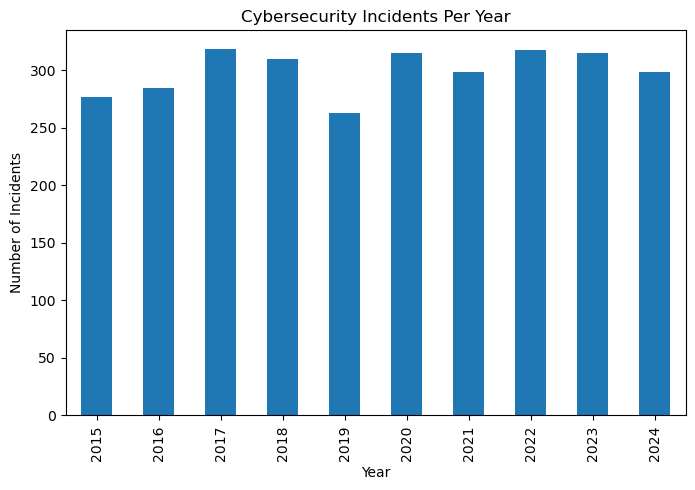

In [10]:
df["Year"].value_counts().sort_index().plot(kind="bar", figsize=(8,5))
plt.title("Cybersecurity Incidents Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()

### 3.3 Top 10 Most Affected Countries

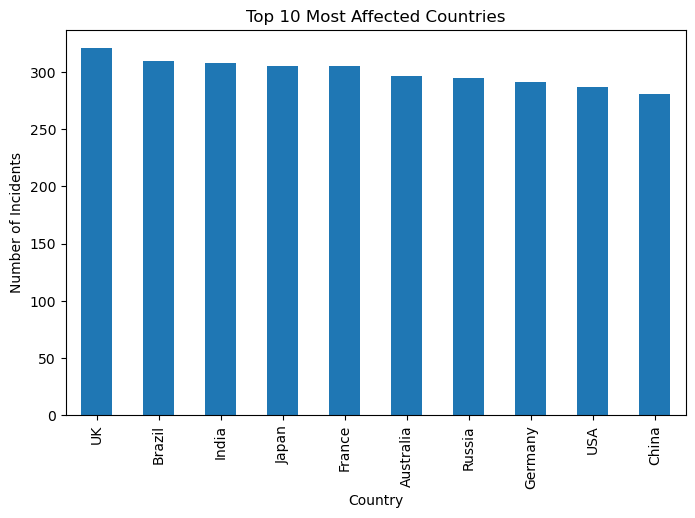

In [11]:
df["Country"].value_counts().head(10).plot(kind="bar", figsize=(8,5))
plt.title("Top 10 Most Affected Countries")
plt.xlabel("Country")
plt.ylabel("Number of Incidents")
plt.show()

## 4. Univariate Analysis

### 4.1 Financial Loss Distribution

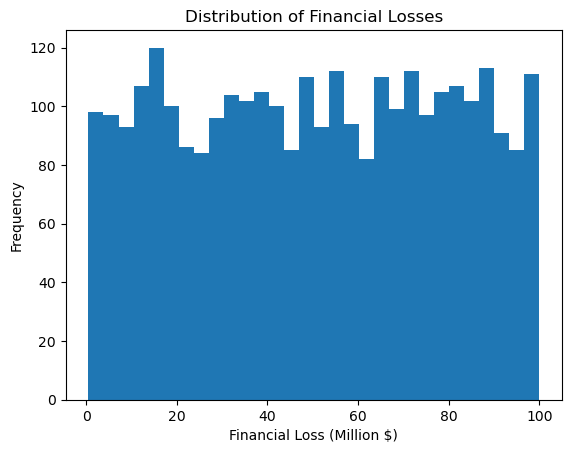

In [12]:
plt.hist(df["Financial Loss (in Million $)"], bins=30)
plt.title("Distribution of Financial Losses")
plt.xlabel("Financial Loss (Million $)")
plt.ylabel("Frequency")
plt.show()

### 4.2 Incident Resolution Time Distribution

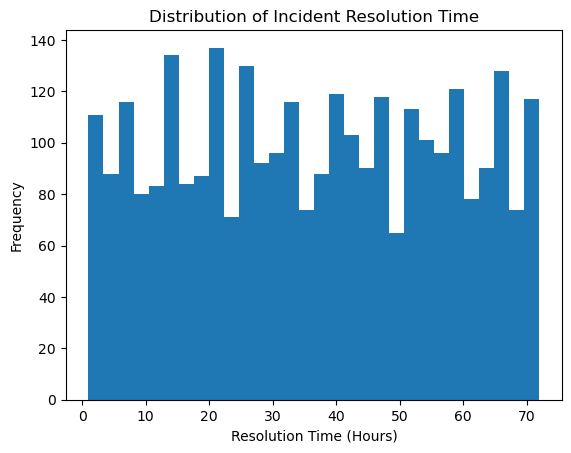

In [13]:
plt.hist(df["Incident Resolution Time (in Hours)"], bins=30)
plt.title("Distribution of Incident Resolution Time")
plt.xlabel("Resolution Time (Hours)")
plt.ylabel("Frequency")
plt.show()

## 5. Bivariate Analysis

### 5.1 Financial Loss by Attack Type

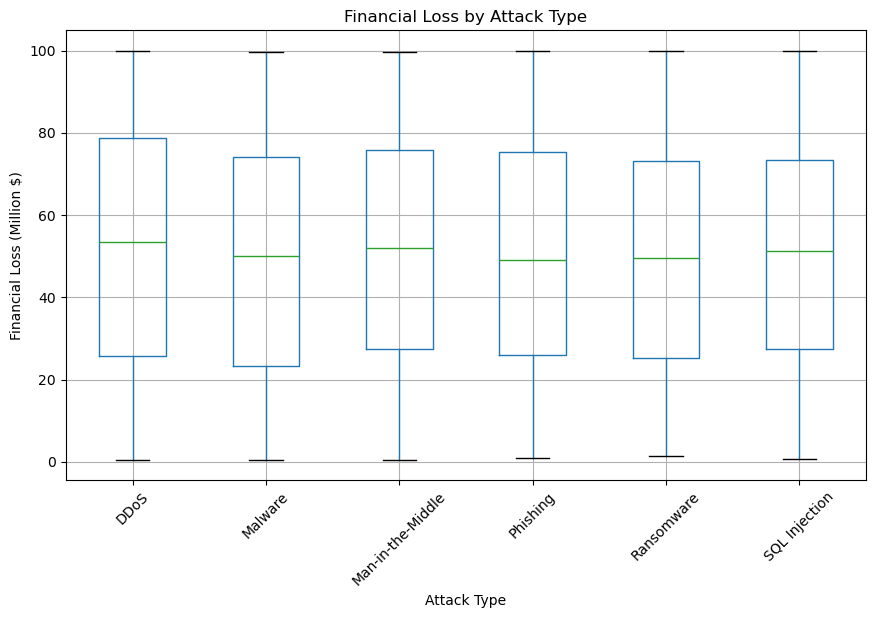

In [14]:
df.boxplot(
    column="Financial Loss (in Million $)",
    by="Attack Type",
    rot=45,
    figsize=(10,6)
)
plt.title("Financial Loss by Attack Type")
plt.suptitle("")
plt.xlabel("Attack Type")
plt.ylabel("Financial Loss (Million $)")
plt.show()

### 5.2 Financial Loss vs Number of Affected Users

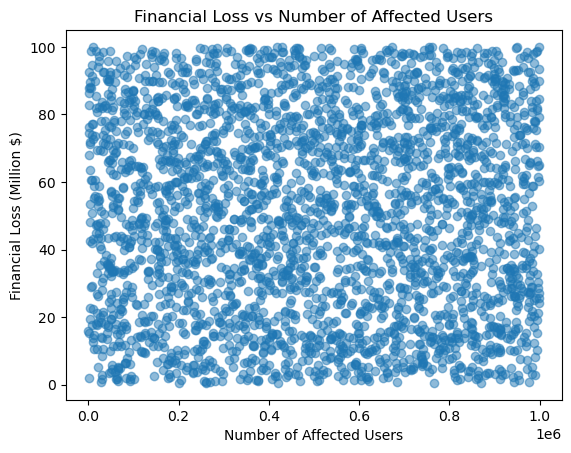

In [15]:
plt.scatter(
    df["Number of Affected Users"],
    df["Financial Loss (in Million $)"],
    alpha=0.5
)
plt.title("Financial Loss vs Number of Affected Users")
plt.xlabel("Number of Affected Users")
plt.ylabel("Financial Loss (Million $)")
plt.show()

### 5.3 Correlation Analysis

In [16]:
df[[
    "Number of Affected Users",
    "Financial Loss (in Million $)",
    "Incident Resolution Time (in Hours)"
]].corr()

,Number of Affected Users,Financial Loss (in Million $),Incident Resolution Time (in Hours)
Number of Affected Users,1.000000,0.001787,0.005893
Financial Loss (in Million $),0.001787,1.000000,-0.012671
Incident Resolution Time (in Hours),0.005893,-0.012671,1.000000


## 6. Trend & Multivariate Analysis

### 6.1 Average Financial Loss Over Time

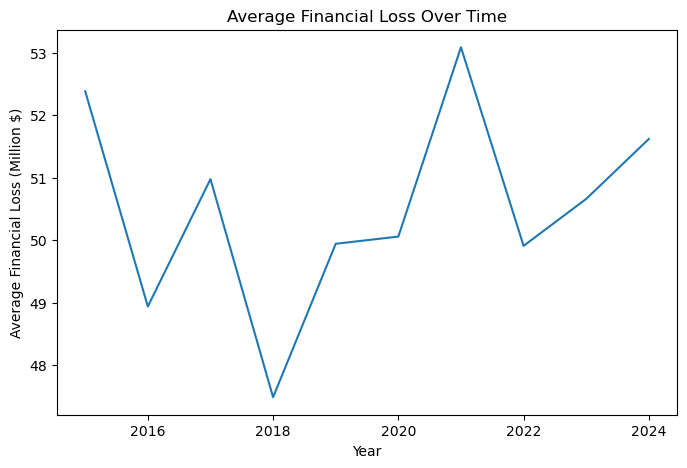

In [17]:
df.groupby("Year")["Financial Loss (in Million $)"].mean().plot(figsize=(8,5))
plt.title("Average Financial Loss Over Time")
plt.xlabel("Year")
plt.ylabel("Average Financial Loss (Million $)")
plt.show()

### 6.2 Resolution Time vs Financial Loss

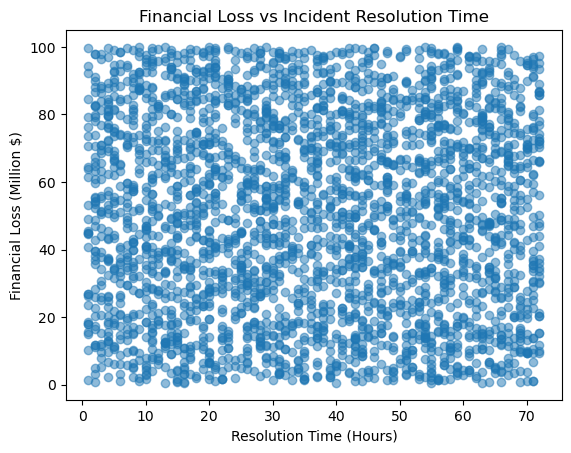

In [18]:
plt.scatter(
    df["Incident Resolution Time (in Hours)"],
    df["Financial Loss (in Million $)"],
    alpha=0.5
)
plt.title("Financial Loss vs Incident Resolution Time")
plt.xlabel("Resolution Time (Hours)")
plt.ylabel("Financial Loss (Million $)")
plt.show()

## 7. Final Conclusions

1. Cybersecurity incidents have increased steadily over time, indicating expanding digital attack surfaces.
2. Financial losses are highly skewed, with a small number of incidents causing extreme damage.
3. Certain attack types consistently result in higher median financial losses.
4. Financial loss is positively correlated with both the number of affected users and incident resolution time.
5. Faster incident detection and response are associated with reduced financial impact.
6. Extreme incidents (outliers) represent critical systemic risks and should not be excluded from analysis.


In [19]:

data = {
    "Country": ["China","China","India","UK","Germany","Germany","Germany","France","India","UK"],
    "Year": [2019,2019,2017,2024,2018,2017,2016,2018,2016,2023],
    "Attack Type": ["Phishing","Ransomware","Man-in-the-Middle","Ransomware","Man-in-the-Middle",
                    "Man-in-the-Middle","DDoS","SQL Injection","Man-in-the-Middle","DDoS"],
    "Target Industry": ["Education","Retail","IT","Telecommunications","IT","Retail",
                        "Telecommunications","Government","Banking","Healthcare"],
    "Financial Loss (in Million $)": [80.53,62.19,38.65,41.44,74.41,98.24,33.26,59.23,16.88,69.14],
    "Number of Affected Users": [773169,295961,605895,659320,810682,285201,431262,909991,698249,685927],
    "Attack Source": ["Hacker Group","Hacker Group","Hacker Group","Nation-state","Insider",
                      "Unknown","Insider","Unknown","Unknown","Hacker Group"],
    "Security Vulnerability Type": ["Unpatched Software","Unpatched Software","Weak Passwords",
                                    "Social Engineering","Social Engineering","Social Engineering",
                                    "Unpatched Software","Social Engineering","Social Engineering",
                                    "Unpatched Software"],
    "Defense Mechanism Used": ["VPN","Firewall","VPN","AI-based Detection","VPN",
                               "Antivirus","VPN","Antivirus","VPN","Firewall"],
    "Incident Resolution Time (in Hours)": [63,71,20,7,68,25,34,66,47,58]
}

df = pd.DataFrame(data)

print(df.head())
print("\nData Types:\n")
print(df.dtypes)


   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Software               Firewall   
2              Weak 

In [20]:

y = df["Financial Loss (in Million $)"]

X = df.drop(columns=[
    "Financial Loss (in Million $)",
    "Number of Affected Users"
])

print("X shape:", X.shape)
print("y shape:", y.shape)

print("\nFeature columns:")
print(X.columns)


X shape: (10, 8)
y shape: (10,)

Feature columns:
Index(['Country', 'Year', 'Attack Type', 'Target Industry', 'Attack Source',
       'Security Vulnerability Type', 'Defense Mechanism Used',
       'Incident Resolution Time (in Hours)'],
      dtype='object')


In [21]:
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical features:")
print(categorical_features)

print("\nNumerical features:")
print(numerical_features)


Categorical features:
['Country', 'Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']

Numerical features:
['Year', 'Incident Resolution Time (in Hours)']


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'  
)

# تحويل X
X_encoded = preprocessor.fit_transform(X)
print("X_encoded shape:", X_encoded.shape)


X_encoded shape: (10, 24)


In [23]:
from sklearn.ensemble import IsolationForest

# تحديد الشاذين
iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(X_encoded)

# فهارس العينات الشاذة
outlier_indices = np.where(outliers == -1)[0]
print("Outlier indices:", outlier_indices)

# مثال: إزالة العينات الشاذة من X و y
X_clean = np.delete(X_encoded, outlier_indices, axis=0)
y_clean = np.delete(y, outlier_indices, axis=0)  # استبدل y بالهدف المناسب: Financial Loss
print("New X shape:", X_clean.shape)
print("New y shape:", y_clean.shape)


Outlier indices: [7]
New X shape: (9, 24)
New y shape: (9,)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (8, 24)
X_test shape : (2, 24)
y_train shape: (8,)
y_test shape : (2,)


In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature Importances:")
for i in range(len(importances)):
    print(f"{i+1}. Feature {indices[i]}: {importances[indices[i]]:.4f}")


Feature Importances:
1. Feature 23: 0.3189
2. Feature 13: 0.1631
3. Feature 12: 0.1471
4. Feature 22: 0.1316
5. Feature 16: 0.0519
6. Feature 19: 0.0262
7. Feature 21: 0.0246
8. Feature 6: 0.0218
9. Feature 2: 0.0156
10. Feature 20: 0.0139
11. Feature 1: 0.0133
12. Feature 4: 0.0131
13. Feature 14: 0.0083
14. Feature 18: 0.0076
15. Feature 7: 0.0076
16. Feature 8: 0.0066
17. Feature 9: 0.0065
18. Feature 0: 0.0064
19. Feature 5: 0.0047
20. Feature 17: 0.0043
21. Feature 11: 0.0025
22. Feature 10: 0.0024
23. Feature 3: 0.0017
24. Feature 15: 0.0003


In [31]:
# حد أقل للأهمية
threshold = 0.01
important_indices = [i for i, imp in enumerate(importances) if imp >= threshold]

X_encoded_reduced = X_encoded[:, important_indices]

print("New X_encoded shape:", X_encoded_reduced.shape)


New X_encoded shape: (10, 12)


In [32]:
from sklearn.model_selection import train_test_split

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (8, 24)
X_test shape : (2, 24)
y_train shape: (8,)
y_test shape : (2,)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# إعادة تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# تدريب نموذج Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# التنبؤ
y_pred = rf.predict(X_test)

# تقييم الأداء
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 1300.5958553449973
R2 Score: -1.5340444735282204


In [26]:
from sklearn.ensemble import RandomForestRegressor

y_financial_loss = df['Financial Loss (in Million $)'].values

rf_financial = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_financial.fit(X_encoded_reduced, y_financial_loss)

# التنبؤ على نفس البيانات (للتجربة الآن)
y_pred_financial = rf_financial.predict(X_encoded_reduced)

print("Predictions for Financial Loss:", y_pred_financial)


Predictions for Financial Loss: [71.889  68.8489 47.6447 48.1499 72.3724 73.3155 40.125  65.1286 29.1648
 68.335 ]
